In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
sns.set()
from collections import defaultdict

### 1) CoupledLogarithm

In [95]:
def coupled_logarithm(value: [int, float, np.ndarray], kappa: float = 0.0, dim: int = 1) -> [float, np.ndarray]:
    """
    Generalization of the logarithm function, which defines smooth
    transition to power functions.
    Inputs
    ----------
    x : Input variable in which the coupled logarithm is applied to.
    kappa : Coupling parameter which modifies the coupled logarithm function.
    dim : The dimension of x, or rank if x is a tensor. Not needed?
    """
    # convert number into np.ndarray to keep consistency
    value = np.array(value) if isinstance(value, (int, float)) else value
    assert isinstance(value, np.ndarray), "value must be an int, float, or np.ndarray."
    assert 0. not in value, "value must not be or contain any zero(s)."
    if kappa == 0:
        coupled_log_value = np.log(value)  # divide by 0 if x == 0
    else:
        coupled_log_value = (1 / kappa) * (value**(kappa / (1 + dim*kappa)) - 1)
    return coupled_log_value


#### Test with scalar --> np.array

In [96]:
X = 3.69369395
kappa = 0.

In [97]:
coupled_logarithm(X, kappa)

1.3066270277762608

#### Test with np.array

In [76]:
# 1000 linearly spaced numbers, starting from ALMOST 0
X = np.linspace(1e-6, 5, 1000)
y = {}

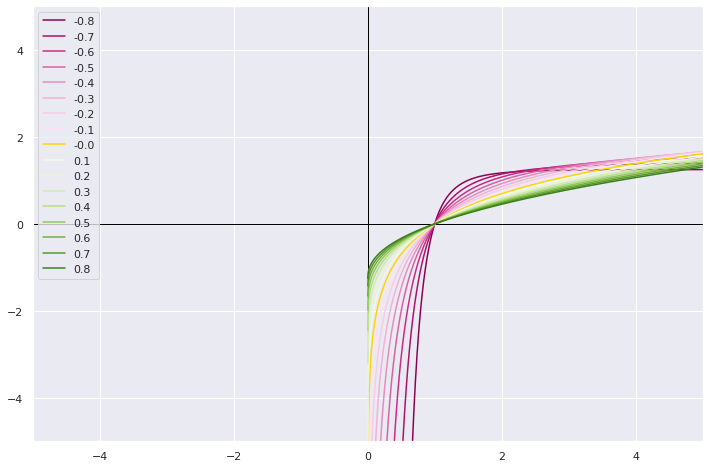

In [77]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.axvline(c='black', lw=1)
ax.axhline(c='black', lw=1)

cm = plt.get_cmap('PiYG')
kappa_values = [round(value, 1) for value in np.arange(-0.8, 0.9, 0.1)]
n = len(kappa_values)
ax.set_prop_cycle(color=['gold' if kappa==0 else cm(1.*i/n) for i, kappa in enumerate(kappa_values)])

plt.xlim(-5, 5)
plt.ylim(-5, 5)

for kappa in kappa_values:
    y[kappa] = coupled_logarithm(X, kappa)
    plt.plot(X, y[kappa], label=kappa)

plt.legend()
plt.show();

### 2) CoupledExponential

In [82]:
def coupled_exponential(value: [int, float, np.ndarray], kappa: float = 0.0, dim: int = 1) -> [float, np.ndarray]:
    """
    Short description
    ----------
    x : Input variable in which the coupled exponential is applied to.
    kappa : Coupling parameter which modifies the coupled exponential function.
    dim : The dimension of x, or rank if x is a tensor.
    """
    # convert number into np.ndarray to keep consistency
    value = np.array(value) if isinstance(value, (int, float)) else value
    assert isinstance(value, np.ndarray), "value must be an int, float, or np.ndarray."
    assert 0. not in value, "value must not be or contain any zero(s)."
    assert isinstance(dim, int) and dim >= 0, "dim must be an integer greater than or equal to 0."
    # removed the requirement on kappa; although not common kappa can be less than -1/dim
    if kappa == 0:
        coupled_exp_value = np.exp(value)
    elif kappa > 0:
        coupled_exp_value = (1 + kappa*value)**(1/(kappa / (1 + dim*kappa))) # removed negative sign and added reciprocal
    # the following is given that kappa < 0        
    elif (1 + kappa*value) >= 0:
        coupled_exp_value = (1 + kappa*value)**(1/(kappa / (1 + dim*kappa))) # removed negative sign and added reciprocal
    elif (kappa / (1 + dim*kappa)) > 0: # removed negative sign
        coupled_exp_value = 0
    else:
        coupled_exp_value = float('inf')
#         else:
#             print("Error: kappa = 1/d is not greater than -1.")
    return coupled_exp_value


#### Test with scalar --> np.array

In [83]:
X = 3.69369395
kappa = 0.5

In [84]:
coupled_exponential(X, kappa)

23.072378632361357

#### Test with np.array

In [44]:
# 100 linearly spaced numbers, starting from CLOSE to 0
X = np.linspace(1e-6, 5, 1000)
y = {}

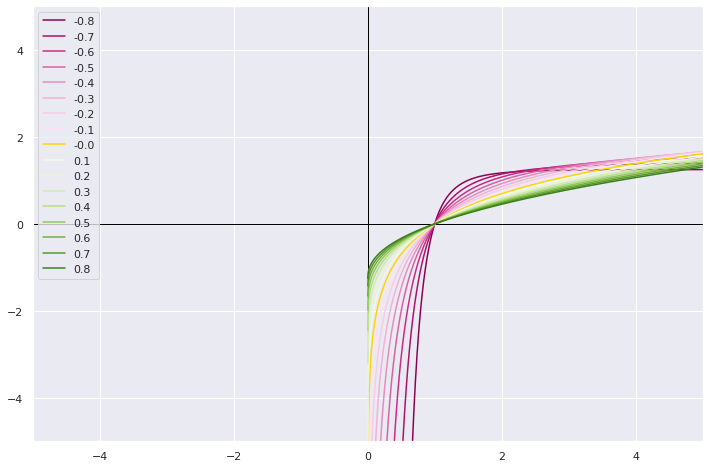

In [45]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.axvline(c='black', lw=1)
ax.axhline(c='black', lw=1)

cm = plt.get_cmap('PiYG')
kappa_values = [round(value, 1) for value in np.arange(-0.8, 0.9, 0.1)]
n = len(kappa_values)
ax.set_prop_cycle(color=['gold' if kappa==0 else cm(1.*i/n) for i, kappa in enumerate(kappa_values)])

plt.xlim(-5, 5)
plt.ylim(-5, 5)

for kappa in kappa_values:
    y[kappa] = coupled_logarithm(X, kappa)
    plt.plot(X, y[kappa], label=kappa)

plt.legend()
plt.show();